In [4]:
!pip install catboost
!pip install scikit-optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV

from collections import Counter
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.0 MB/s eta 0:00:00


In [5]:
df = pd.read_excel('/content/Liga12024_2025_FIXX.xlsx')

In [6]:
df.head()

,Nama_Pemain,Umur,Tinggi,Berat,Posisi,Kewarganegaraan,Klub_Saat_Ini,Liga,Tahun_Pro,Jumlah_Klub,...,Assist_Musim,Kartu_Kuning,Kartu_Merah,Piala_Klub,Penghargaan_Timnas,Penalti,Cedera_Hari,IG_Followers,Berita_Google,Market_Value
0,Gustavo Almeida dos Santos,29,185,80,CF,Brasil,Persija Jakarta,Liga 1,2018,8,...,0,6,1,0,0,3,0,161000,Sedang,320918
1,Witan Sulaeman,23,170,66,LWF,Indonesia,Persija Jakarta,Liga 1,2019,7,...,6,4,0,0,3,0,0,2700000,Tinggi,356550
2,Ryo Matsumura,31,166,64,AMF,Jepang,Persija Jakarta,Liga 1,2013,10,...,8,3,0,1,0,0,0,209000,Sedang,320918
3,Muhammad Ferrari,22,181,76,CB,Indonesia,Persija Jakarta,Liga 1,2018,2,...,3,1,1,1,1,0,0,518000,Tinggi,252376
4,Maciej Gajos,34,174,65,AMF,Polandia,Persija Jakarta,Liga 1,2013,4,...,5,5,1,2,0,0,0,116000,Sedang,160500


In [7]:
df.tail()

,Nama_Pemain,Umur,Tinggi,Berat,Posisi,Kewarganegaraan,Klub_Saat_Ini,Liga,Tahun_Pro,Jumlah_Klub,...,Assist_Musim,Kartu_Kuning,Kartu_Merah,Piala_Klub,Penghargaan_Timnas,Penalti,Cedera_Hari,IG_Followers,Berita_Google,Market_Value
220,Lucas Barreto,30,187,80,RB,Brasil,PSIS Semarang,Liga 1,2018,4,...,1,6,0,1,0,0,0,6026,Rendah,91500
221,Tri Setiawan,21,178,73,CMD,Indonesia,PSIS Semarang,Liga 1,2023,1,...,1,0,0,0,0,0,0,7300,Rendah,91500
222,Septian David,28,174,60,AMF,Indonesia,PSIS Semarang,Liga 1,2015,2,...,3,2,0,0,0,0,0,456000,Tinggi,183100
223,Gali Freitas,20,165,55,RWF,Timor Leste,PSIS Semarang,Liga 1,2017,5,...,4,7,0,0,0,0,0,86300,Sedang,183100
224,Abdallah Sudi,25,180,78,CF,Burundi,PSIS Semarang,Liga 1,2018,8,...,1,0,0,1,0,0,93,18800,Rendah,114200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nama_Pemain         225 non-null    object
 1   Umur                225 non-null    int64 
 2   Tinggi              225 non-null    int64 
 3   Berat               225 non-null    int64 
 4   Posisi              225 non-null    object
 5   Kewarganegaraan     225 non-null    object
 6   Klub_Saat_Ini       225 non-null    object
 7   Liga                225 non-null    object
 8   Tahun_Pro           225 non-null    int64 
 9   Jumlah_Klub         225 non-null    int64 
 10  Cap_Timnas          225 non-null    int64 
 11  Gol_Timnas          225 non-null    int64 
 12  Sisa_Kontrak        225 non-null    int64 
 13  Nilai_Klub          225 non-null    int64 
 14  Pertandingan        225 non-null    int64 
 15  Menit               225 non-null    int64 
 16  Gol_Musim           225 no

In [9]:
df.describe()

,Umur,Tinggi,Berat,Tahun_Pro,Jumlah_Klub,Cap_Timnas,Gol_Timnas,Sisa_Kontrak,Nilai_Klub,Pertandingan,...,Gol_Musim,Assist_Musim,Kartu_Kuning,Kartu_Merah,Piala_Klub,Penghargaan_Timnas,Penalti,Cedera_Hari,IG_Followers,Market_Value
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,2.250000e+02,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,2.250000e+02,225.000000
mean,28.315556,178.146667,71.284444,2015.875556,6.151111,4.217778,0.524444,0.640000,3.415209e+06,24.702222,...,2.715556,1.960000,3.382222,0.146667,0.946667,0.133333,0.191111,9.262222,2.503095e+05,185657.017778
std,4.353055,8.238672,8.737183,4.361211,4.147322,10.781169,2.299180,0.737515,1.143903e+06,7.225034,...,4.273985,2.385447,2.369005,0.378908,1.537275,0.453163,0.831259,24.808870,5.398637e+05,90790.370070
min,18.000000,158.000000,50.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,5.735780e+05,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9138.000000
25%,25.000000,172.000000,65.000000,2013.000000,3.000000,0.000000,0.000000,0.000000,2.538206e+06,18.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.490000e+04,114754.000000
50%,28.000000,178.000000,72.000000,2016.000000,5.000000,0.000000,0.000000,1.000000,3.410364e+06,27.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.720000e+04,183440.000000
75%,31.000000,184.000000,77.000000,2019.000000,9.000000,1.000000,0.000000,1.000000,4.544755e+06,30.000000,...,3.000000,3.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.340000e+05,252037.000000
max,42.000000,210.000000,100.000000,2024.000000,24.000000,76.000000,26.000000,3.000000,5.029020e+06,36.000000,...,29.000000,13.000000,13.000000,2.000000,13.000000,3.000000,9.000000,169.000000,3.500000e+06,504752.000000


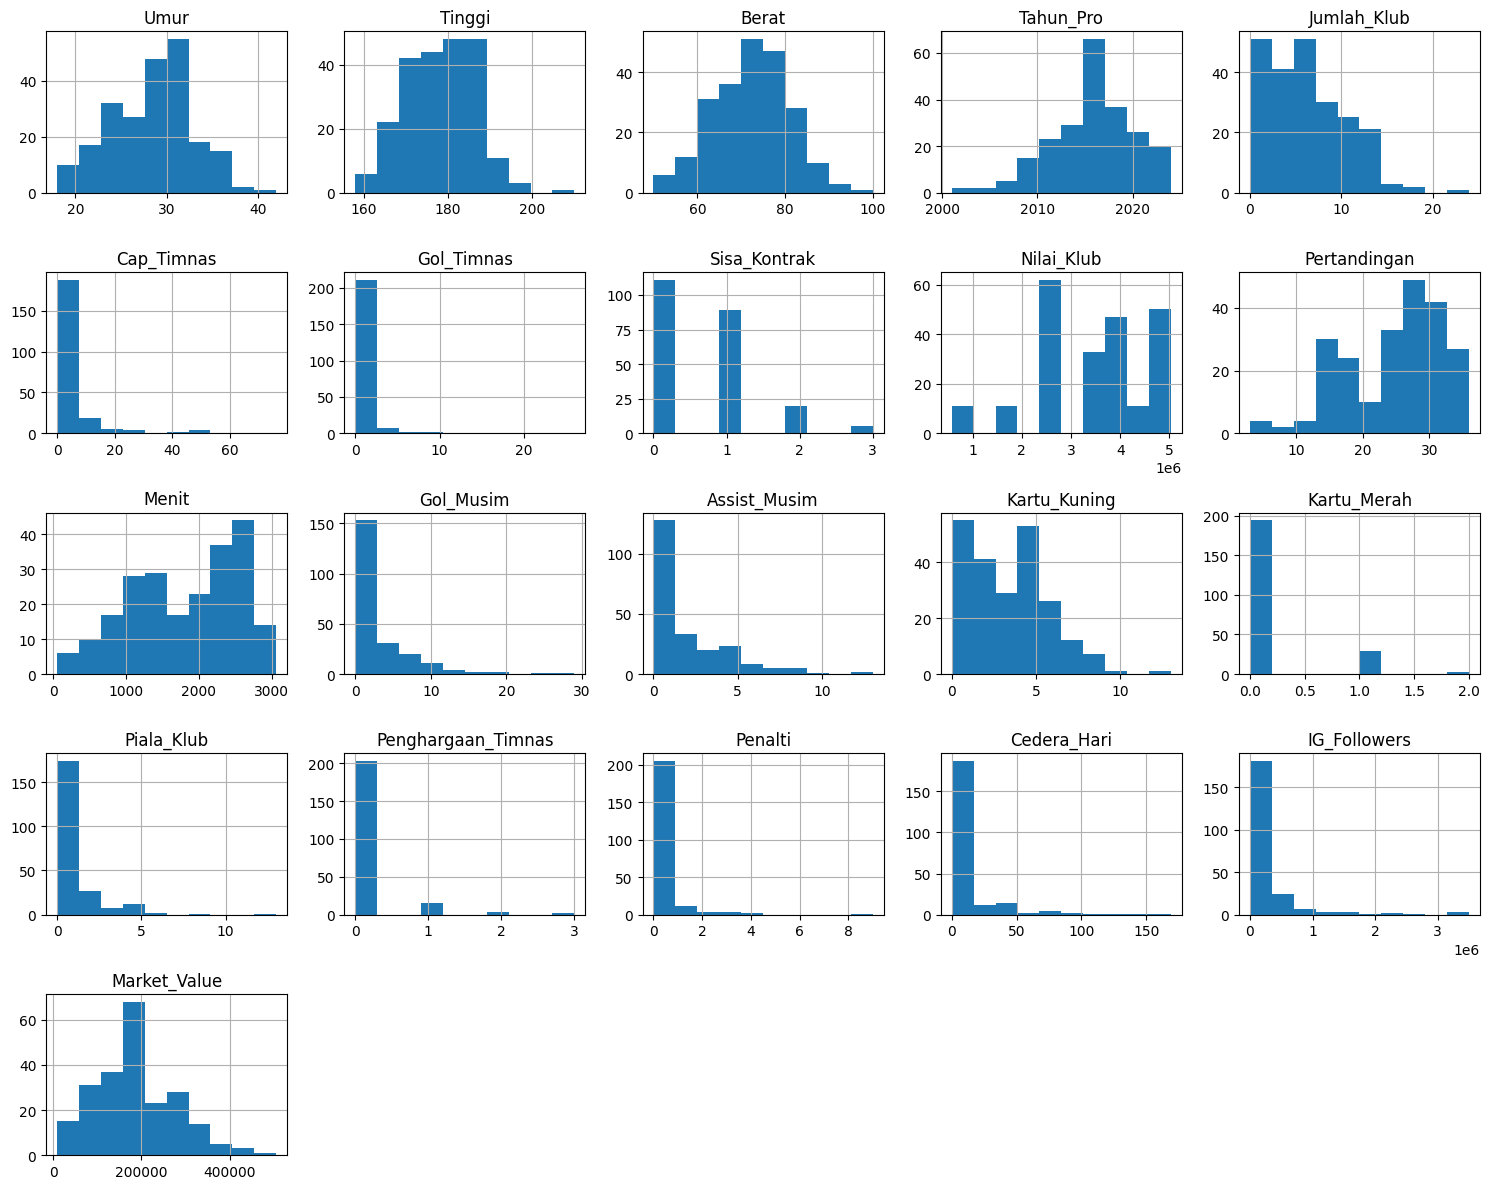

In [10]:
df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()


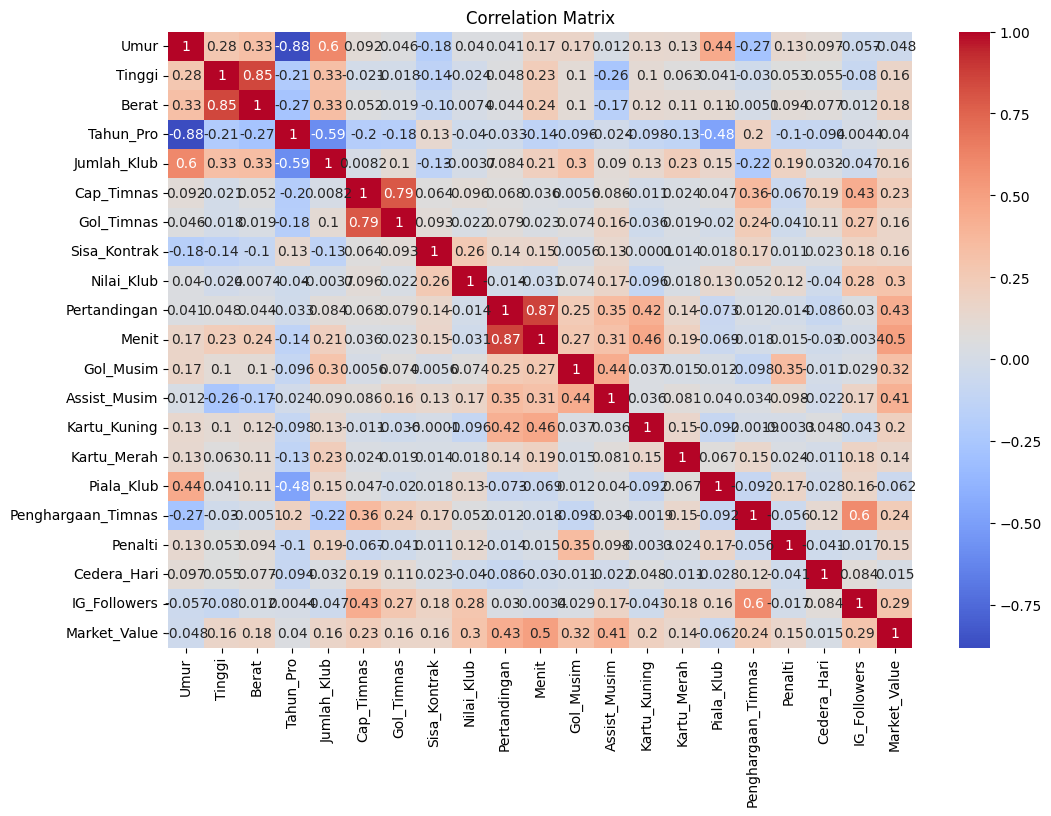

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
threshold = df['Market_Value'].quantile(0.75)

df['Market_Value_Tier'] = np.where(
    df['Market_Value'] >= threshold,
    1,
    0
)

df.drop(columns=['Market_Value'], inplace=True)


In [14]:
df['Goals_Per_Minute'] = df['Gol_Musim'] / df['Menit'].replace(0,1)
df['Assists_Per_Minute'] = df['Assist_Musim'] / df['Menit'].replace(0,1)
df['Contribution_Per_Minute'] = (df['Gol_Musim'] + df['Assist_Musim']) / df['Menit'].replace(0,1)
df['Long_Career'] = 2025 - df['Tahun_Pro']


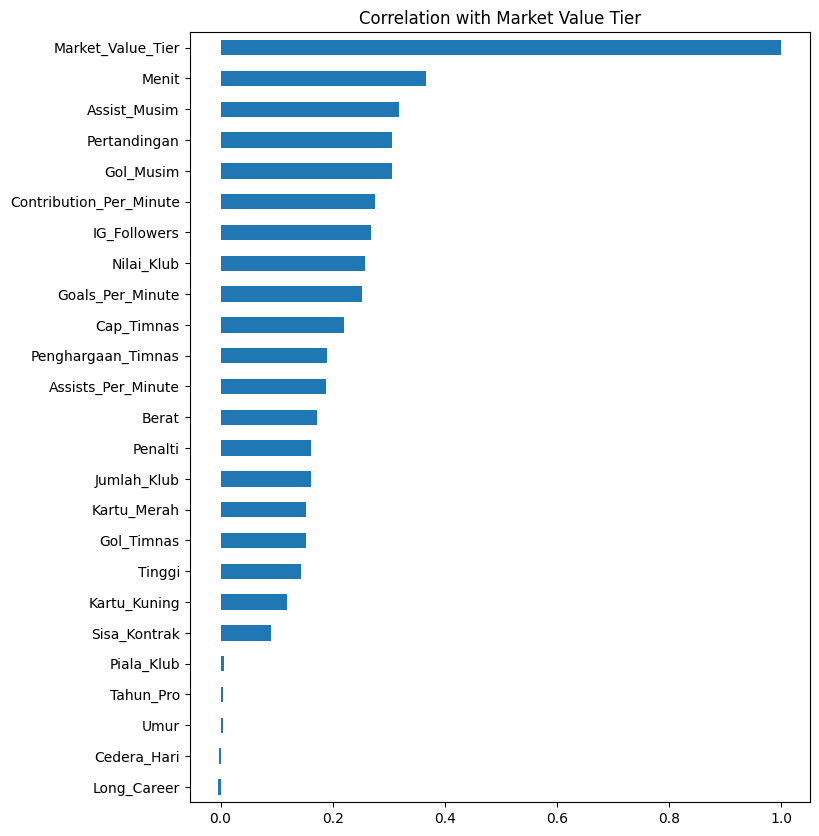

In [15]:
corr_target = df.corr(numeric_only=True)['Market_Value_Tier'].sort_values()

plt.figure(figsize=(8,10))
corr_target.plot(kind='barh')
plt.title("Correlation with Market Value Tier")
plt.show()


In [16]:
df.replace(["-", "?"], np.nan, inplace=True)
df.isnull().sum()


,0
Nama_Pemain,0
Umur,0
Tinggi,0
Berat,0
Posisi,0
Kewarganegaraan,0
Klub_Saat_Ini,0
Liga,0
Tahun_Pro,0
Jumlah_Klub,0


In [19]:
df['Berita_Google'].unique()

array(['Sedang', 'Tinggi', 'Rendah'], dtype=object)

In [20]:
df.duplicated().sum()


np.int64(0)

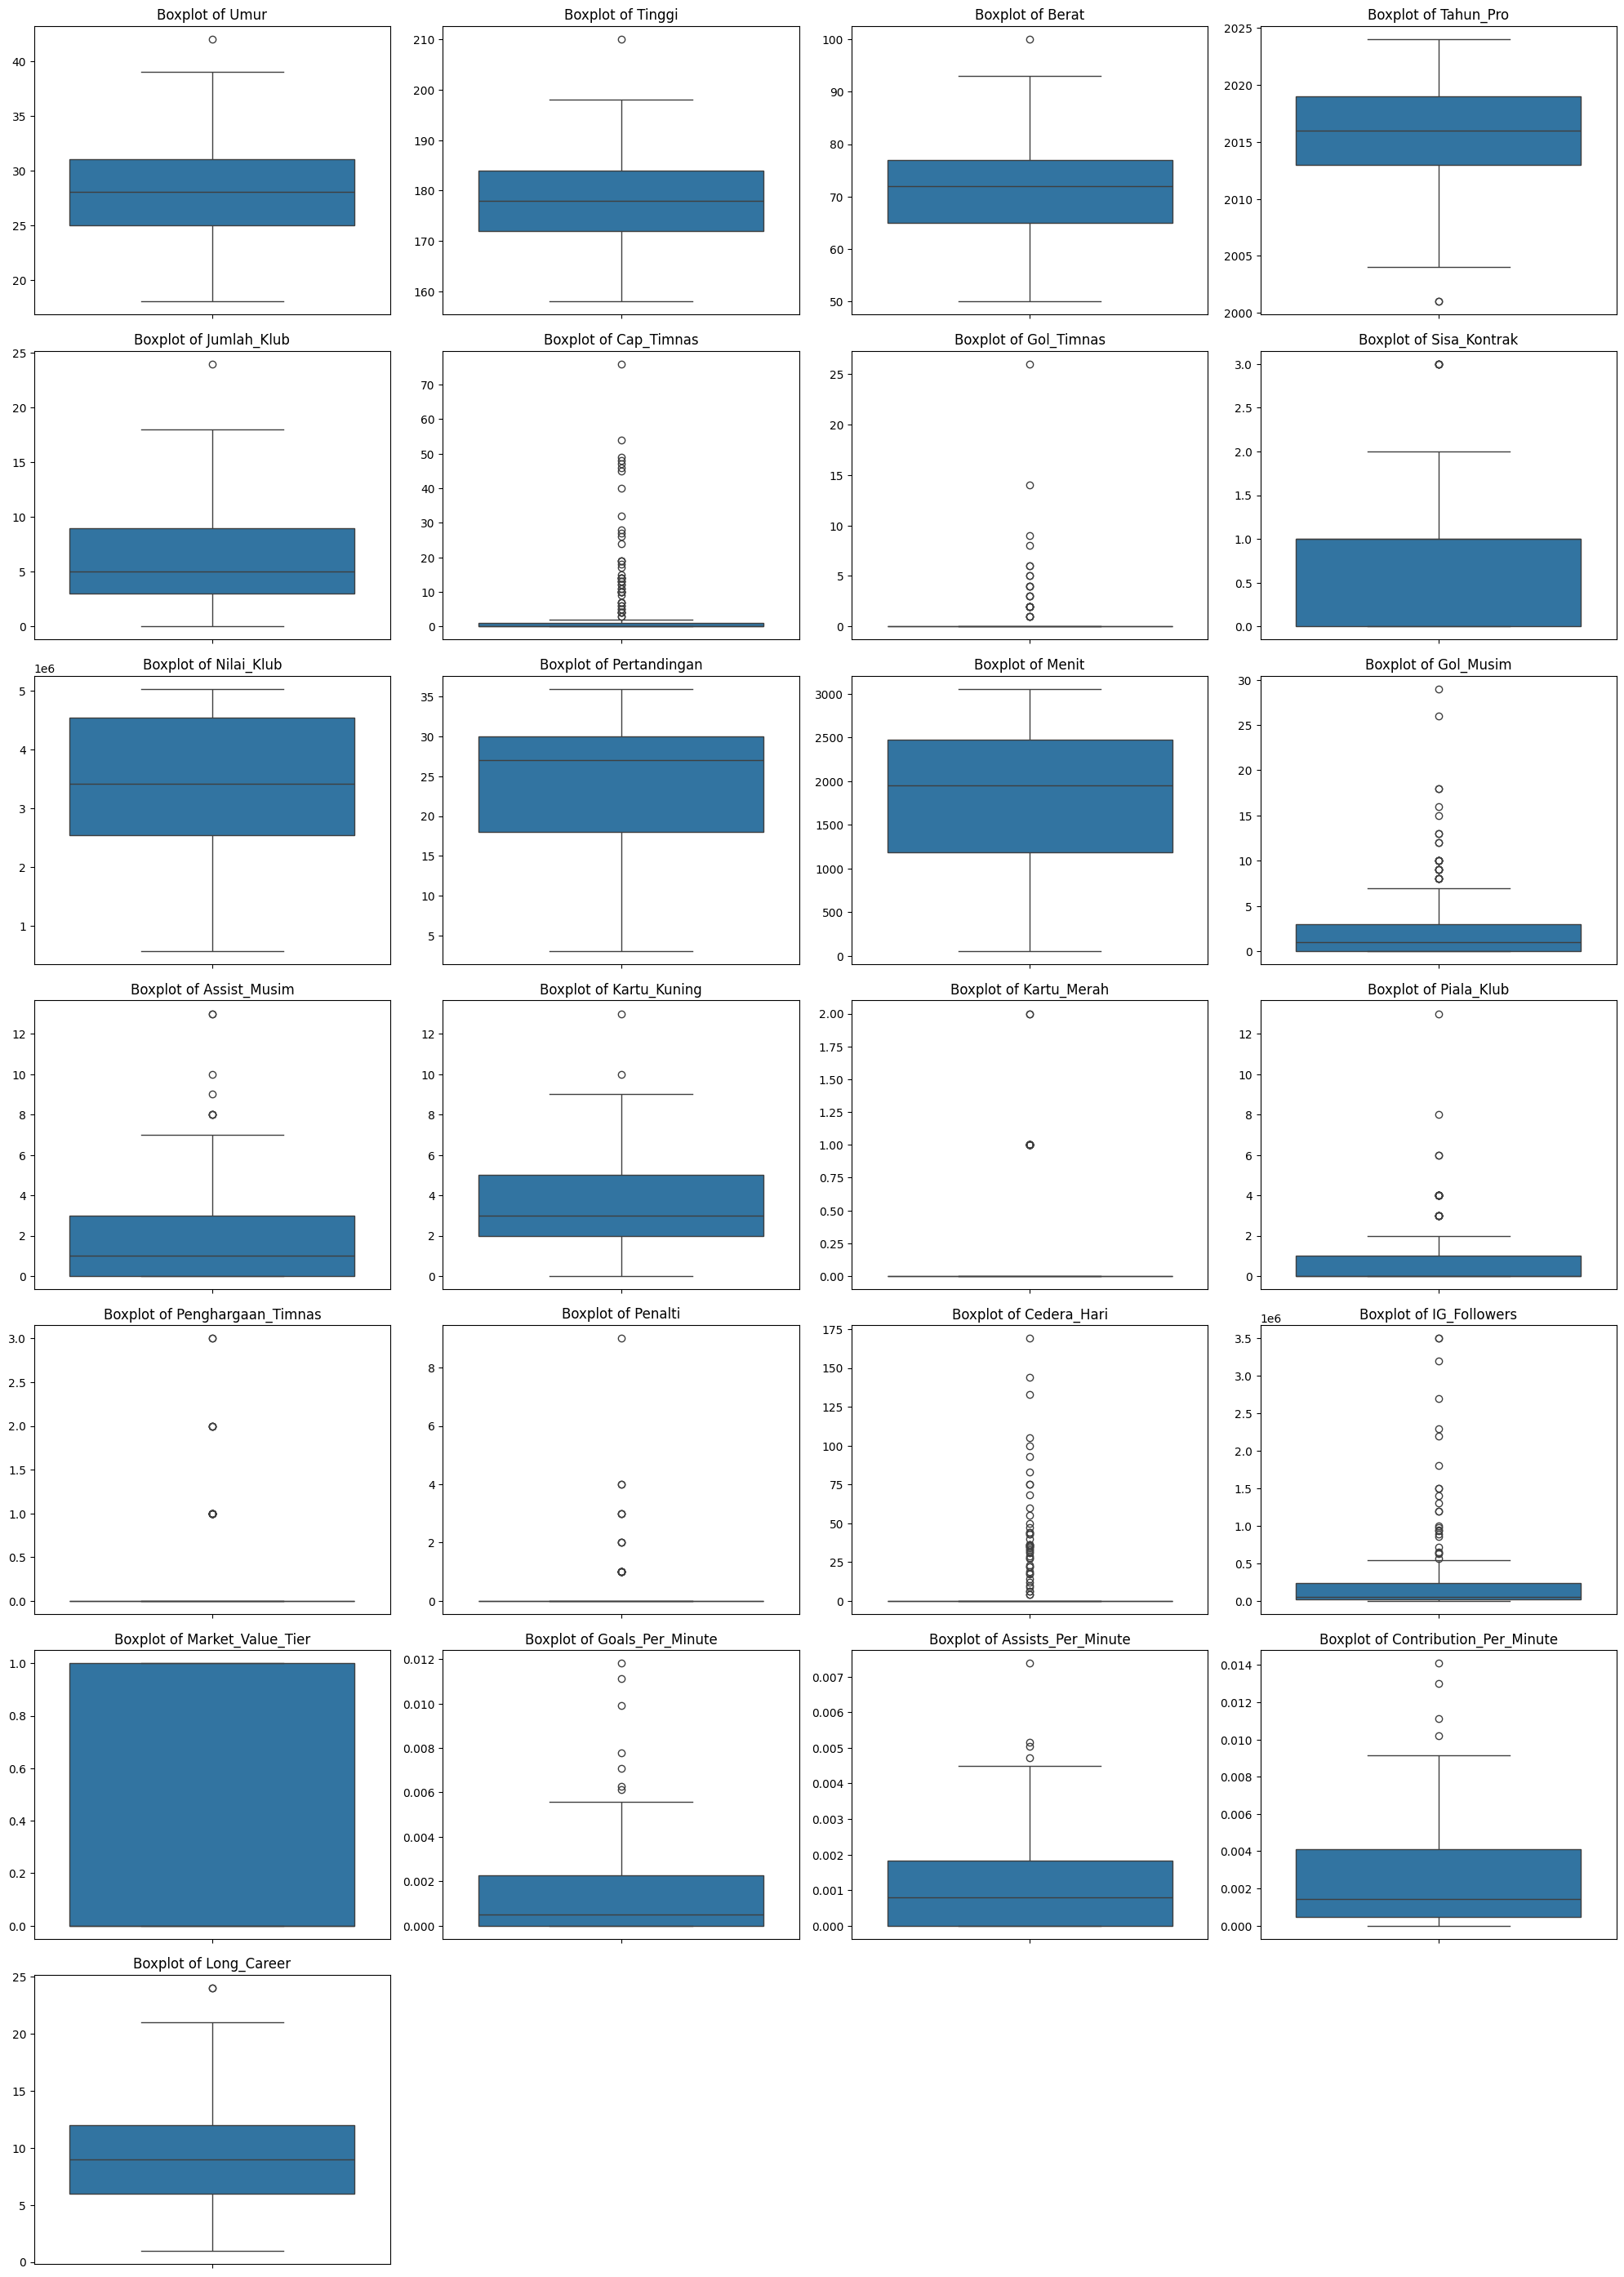

In [22]:
numeric_cols = df.select_dtypes(include=np.number).columns
num_plots = len(numeric_cols)
num_cols = 4 # You can adjust this for desired grid width
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('') # Remove y-label to avoid clutter

plt.tight_layout()
plt.show()

In [23]:
# Numerik → Median
for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].median(), inplace=True)

# Kategorikal → Modus
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3597116177.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3597116177.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [25]:
df['Berita_Google'] = df['Berita_Google'].map({
    'Rendah':1,
    'Sedang':2,
    'Tinggi':3
})

In [26]:
df.drop_duplicates(inplace=True)


In [27]:
for col in df.select_dtypes(include=np.number):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], lower, upper)


In [28]:
df.drop(columns=['Nama_Pemain'], inplace=True)

X = df.drop('Market_Value_Tier', axis=1)
y = df['Market_Value_Tier']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))


In [31]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(
    X_test_encoded, join='left', axis=1, fill_value=0)


In [32]:
y_train.value_counts(normalize=True)


,proportion
Market_Value_Tier,
0,0.744444
1,0.255556


/tmp/ipython-input-2191505504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


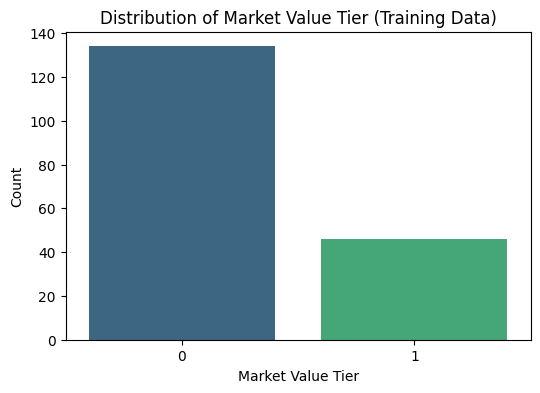

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette='viridis')
plt.title('Distribution of Market Value Tier (Training Data)')
plt.xlabel('Market Value Tier')
plt.ylabel('Count')
plt.show()

In [34]:
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]


In [35]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_encoded, y_train)
rf_pred = rf.predict(X_test_encoded)


In [36]:
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_encoded, y_train)

probs = xgb.predict_proba(X_test_encoded)[:,1]

best_threshold = 0
best_f1 = 0

for t in np.arange(0.2,0.81,0.05):
    preds = (probs >= t).astype(int)
    score = f1_score(y_test, preds)
    if score > best_f1:
        best_f1 = score
        best_threshold = t

xgb_pred = (probs >= best_threshold).astype(int)


In [37]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

cat = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    class_weights=[1, scale_pos_weight],
    verbose=0,
    random_state=42
)

cat.fit(X_train, y_train, cat_features=cat_features)
cat_pred = cat.predict(X_test)


In [38]:
def evaluate(y_true, y_pred, name):
    print(f"\n{name}")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    return [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        f1_score(y_true, y_pred)
    ]

rf_score = evaluate(y_test, rf_pred, "Random Forest")
xgb_score = evaluate(y_test, xgb_pred, "XGBoost")
cat_score = evaluate(y_test, cat_pred, "CatBoost")



Random Forest
[[33  1]
 [ 9  2]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        34
           1       0.67      0.18      0.29        11

    accuracy                           0.78        45
   macro avg       0.73      0.58      0.58        45
weighted avg       0.76      0.78      0.73        45


XGBoost
[[27  7]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.46      0.55      0.50        11

    accuracy                           0.73        45
   macro avg       0.65      0.67      0.66        45
weighted avg       0.75      0.73      0.74        45


CatBoost
[[26  8]
 [ 5  6]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        34
           1       0.43      0.55      0.48        11

    accuracy                           0.71        45
   macro avg       0.63      0.66    

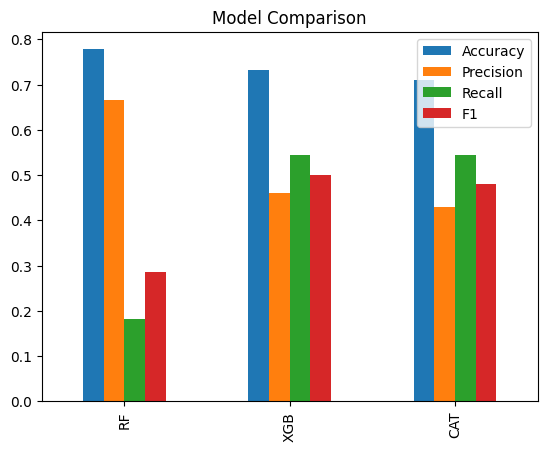

In [39]:
results = pd.DataFrame(
    [rf_score, xgb_score, cat_score],
    columns=["Accuracy","Precision","Recall","F1"],
    index=["RF","XGB","CAT"]
)

results.plot(kind="bar")
plt.title("Model Comparison")
plt.show()


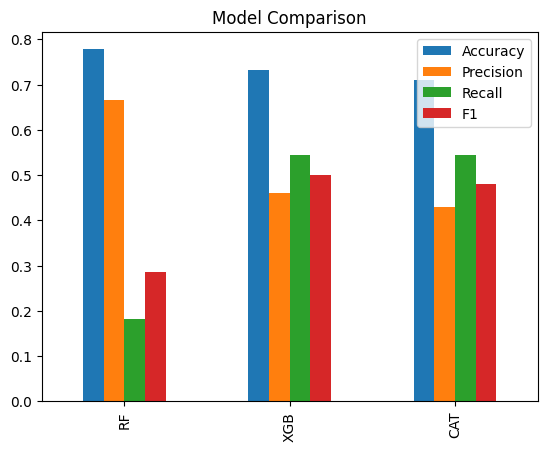

In [40]:
results = pd.DataFrame(
    [rf_score, xgb_score, cat_score],
    columns=["Accuracy","Precision","Recall","F1"],
    index=["RF","XGB","CAT"]
)

results.plot(kind="bar")
plt.title("Model Comparison")
plt.show()


In [41]:
bayes = BayesSearchCV(
    XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss'),
    {
        'n_estimators': (300,900),
        'max_depth': (3,8),
        'learning_rate': (0.03,0.1,'log-uniform')
    },
    cv=5,
    scoring='f1_macro'
)

bayes.fit(X_train_encoded, y_train)


BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constrain...
                                      max_cat_threshold=None,
                                      max_cat_to_onehot=None,
                                      max_delta_step=None, max_depth=None,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None, ...),
              scoring='f1_macro',
              search_spaces={'learning_rate': (0.03, 0.1, 'log-uniform'),
                             'max_depth': (3, 8), 'n_estimators': (300, 900)})

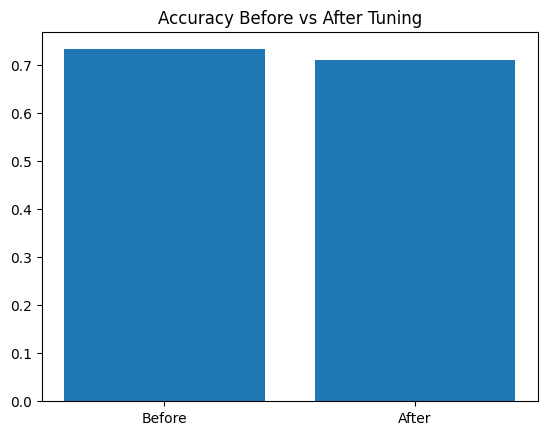

In [42]:
before = xgb_score[0]
after = accuracy_score(y_test, bayes.predict(X_test_encoded))

plt.bar(["Before","After"], [before, after])
plt.title("Accuracy Before vs After Tuning")
plt.show()


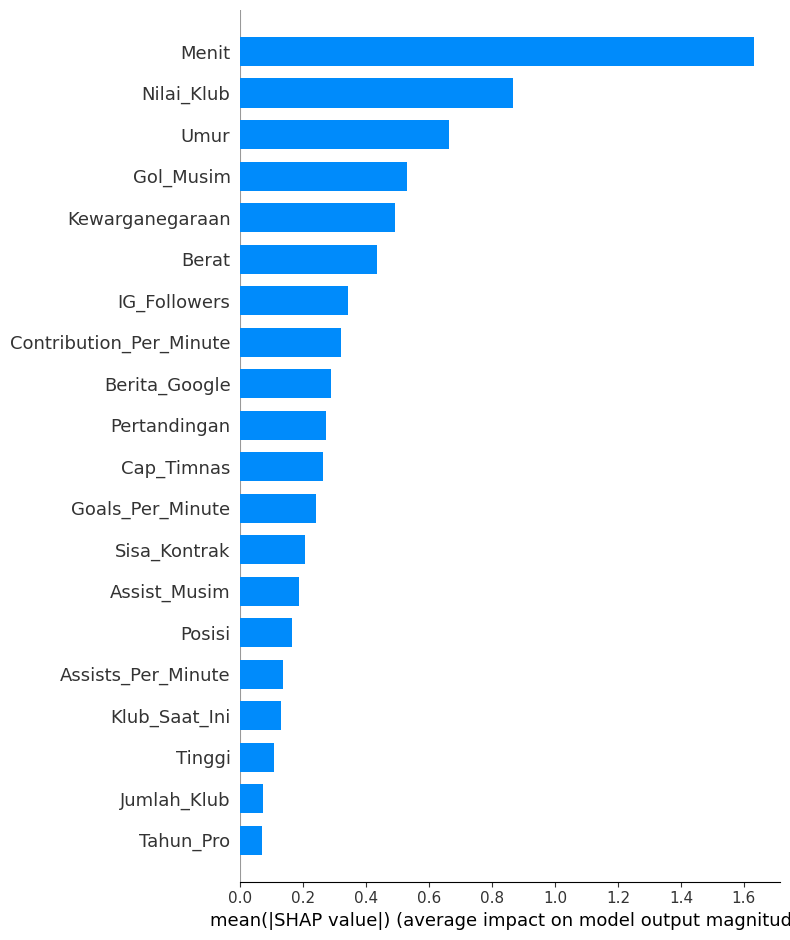

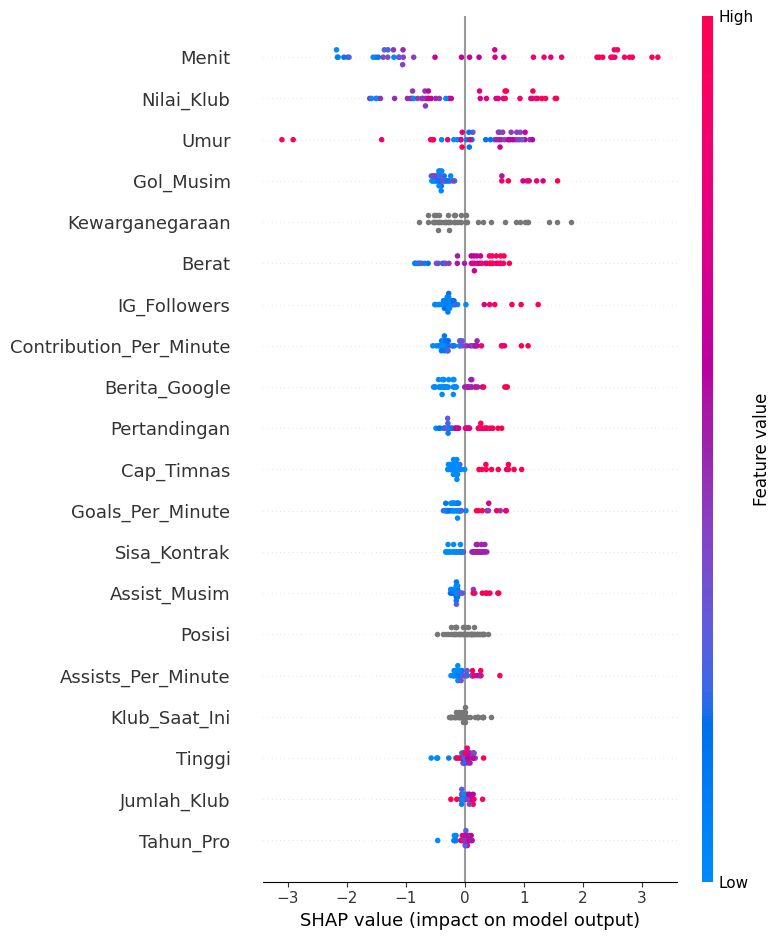

In [43]:
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
